In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearch

# Importing Dataset

Dataset in excel format and  use pandas read_excel to load the data

In [2]:
train_data=pd.read_excel(r"C:\Users\Menaka\Desktop\Flight fare prediction\Data_Train.xlsx")
test_data=pd.read_excel(r"C:\Users\Menaka\Desktop\Flight fare prediction\test_set.xlsx")

To display All the columns

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Exploratory Data Analysis

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
3h 25m       1
47h 40m      1
41h 20m      1
29h 10m      1
28h 30m      1
Name: Duration, Length: 368, dtype: int64

Dropping rows of null values

In [8]:
train_data.dropna(inplace=True)

Here we can null values are dropped

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

to_datetime used to separate date and month from Date_of_Journey  column

In [10]:
train_data['Journey_date']=pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [11]:
train_data['Journey_date'].unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21], dtype=int64)

In [12]:
train_data['Journey_month']=pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.month
train_data['Journey_month'].unique()

array([3, 5, 6, 4], dtype=int64)

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
train_data["Dep_hour"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute

In [15]:
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [16]:
train_data["Arrival_hour"]=pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data["Arrival_min"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


Duration column represents time taken from started journey place to  destination place (arrival time - departure time)

In [17]:
# Assigning and converting Duration column into list
duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2: #Check if duration contains only hour or mins
       if "h" in duration[i]:
           duration[i]=duration[i].strip()+ " 0m"  #Adds 0 minute
       else:
           duration[i] = "0h " + duration[i]   ## Adds 0 hour
duration_hour=[]
duration_min=[]
for i in range (len(duration)):
    duration_hour.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [18]:
## Adding duration_hours and duration_mins list to train_data dataframe
train_data['duration_hour']= duration_hour
train_data['duration_min']=duration_min

In [19]:
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50


Drop the not nessasary Column

In [20]:
train_data.drop(['Date_of_Journey'],inplace=True,axis=1)
train_data.drop(['Arrival_Time'],inplace=True,axis=1)
train_data.drop(['Dep_Time'],inplace=True,axis=1)
train_data.drop(['Duration'],inplace=True,axis=1)


In [21]:
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


# Handling Categorical Data
#label encoder -data in order- "Ordinal data"
#One hotencoder-data in not order-"Nominal data"



In [22]:
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [23]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# Visualization

Airline Column

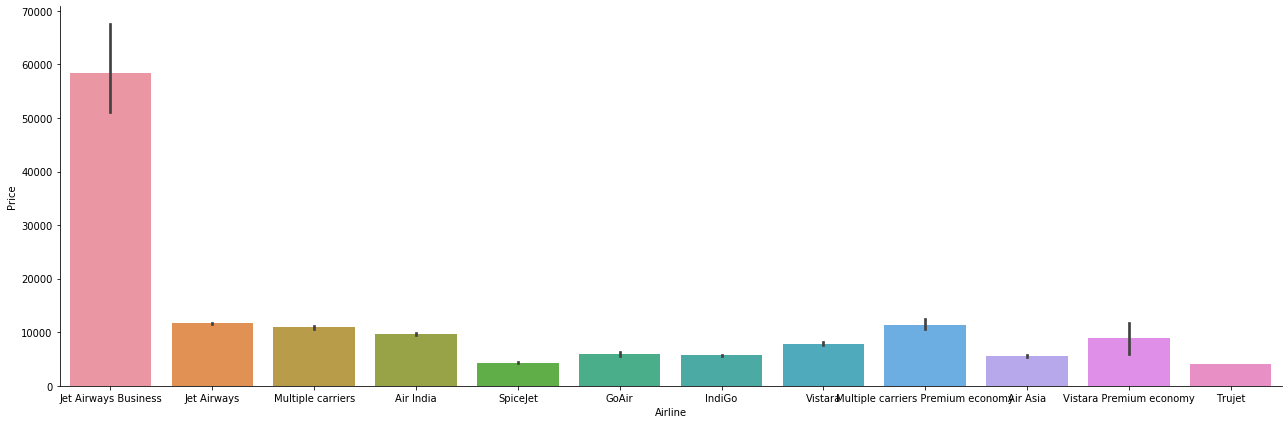

In [24]:
sns.catplot(x = 'Airline', y = 'Price' , data = train_data.sort_values(by = 'Price' , ascending=False), height=6, aspect=3, kind='bar');

OneHotEncoder

In [25]:
airline=train_data[['Airline']]
airline=pd.get_dummies(airline,drop_first=True)
airline.head(1)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0


Source

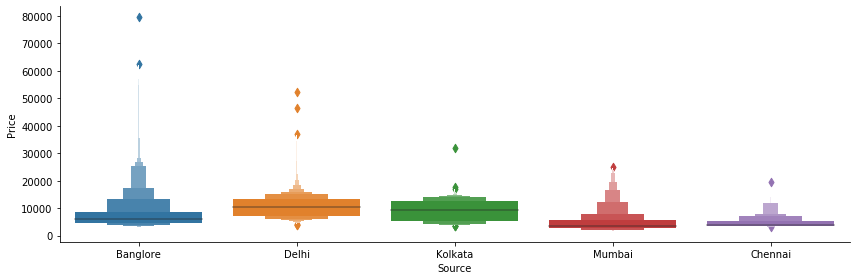

In [26]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [27]:
Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


Destination

In [28]:
train_data["Destination"].value_counts()


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

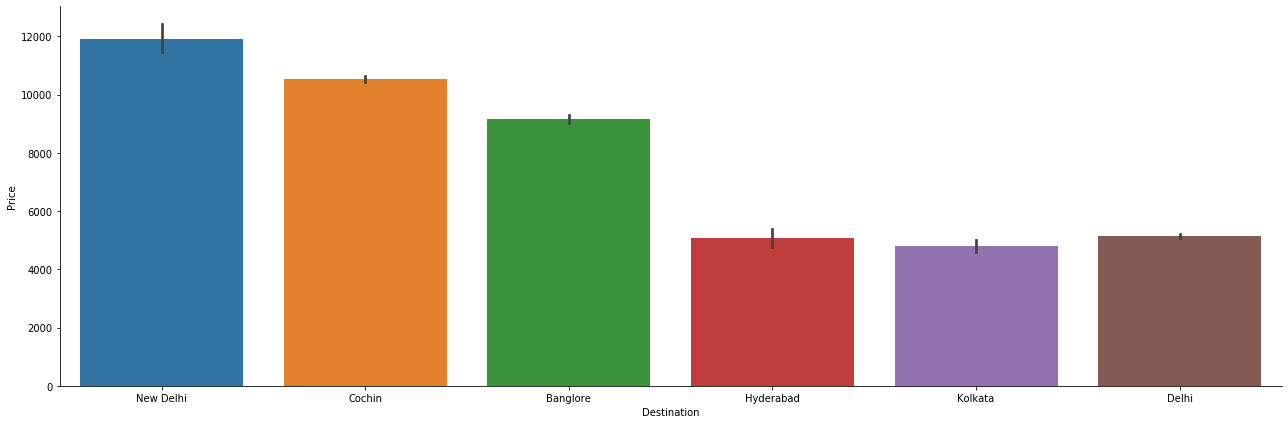

In [29]:
sns.catplot(x = 'Destination', y = 'Price' , data = train_data.sort_values(by = 'Price' , ascending=False), height=6, aspect=3, kind='bar');

In [30]:
destination = train_data[["Destination"]]
destination = pd.get_dummies(destination, drop_first= True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


Route,Additional Information

In [31]:
train_data["Route"] 

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [32]:
train_data['Additional_Info'].value_counts()  # no info value is high

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

Dropping route and additional info column

In [33]:
train_data.drop(['Additional_Info','Route'],axis=1,inplace=True)

Total_stops

In [34]:
train_data['Total_Stops'] .value_counts()      
 

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

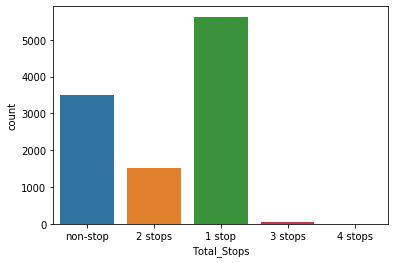

In [35]:
sns.countplot(train_data["Total_Stops"])

# #Label Encoder

In [36]:
le=LabelEncoder()
train_data["Total_Stops"]=le.fit_transform(train_data["Total_Stops"])
train_data["Total_Stops"].value_counts()

0    5625
4    3491
1    1520
2      45
3       1
Name: Total_Stops, dtype: int64

In [37]:
train_data.head(1)

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,4,3897,24,3,22,20,1,10,2,50


In [38]:
data_train = pd.concat([train_data,airline, Source, destination], axis = 1)


In [39]:
data_train.head(1)

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,4,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_train.head(1)

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
data_train.shape

(10682, 30)

# Feature Selection


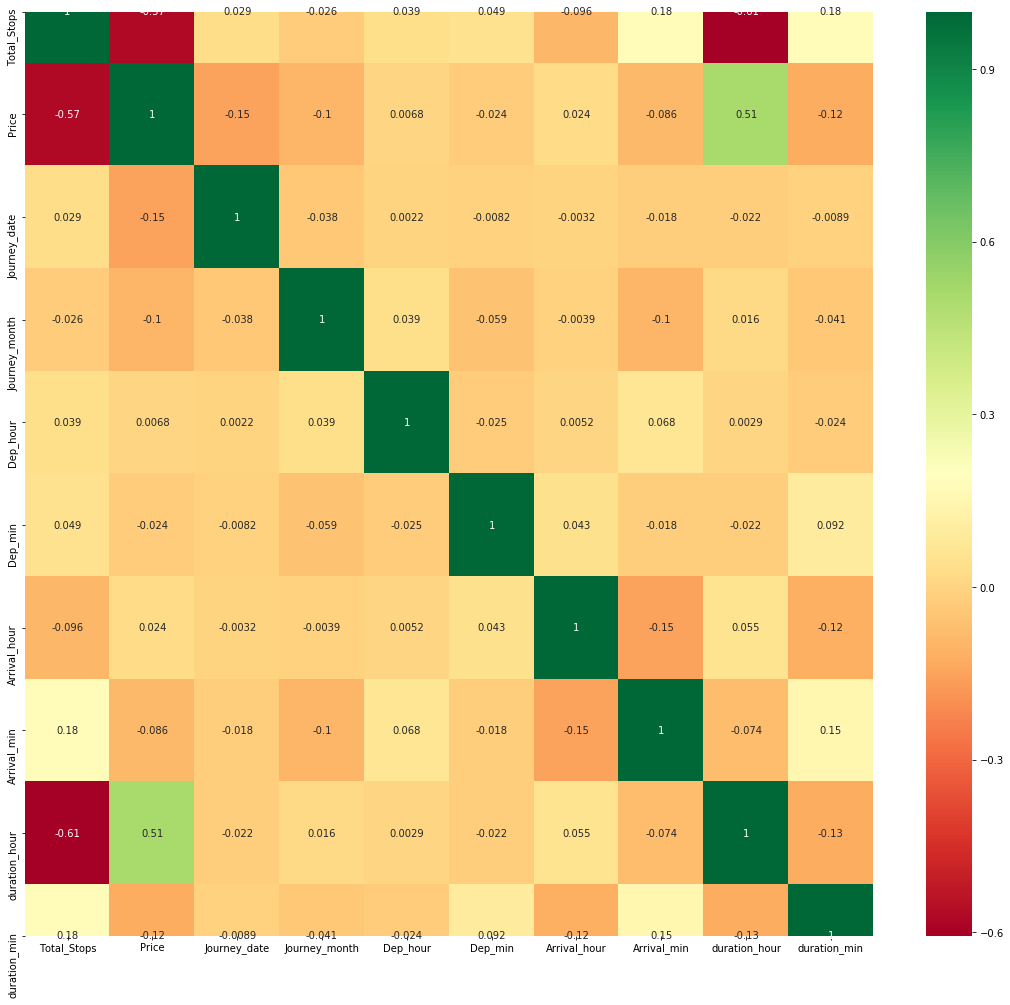

In [42]:
plt.figure(figsize = (19,17))
sns.heatmap(train_data.corr(),annot =True, cmap = "RdYlGn")
plt.show()

ALL Column Names

In [43]:
data_train.columns


Index(['Total_Stops', 'Price', 'Journey_date', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hour',
       'duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

# Taking Independent and dependent Variable

In [44]:
x=data_train.loc[:,['Total_Stops','Journey_date', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hour',
       'duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [45]:
y=data_train.iloc[:,1]

In [46]:
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [47]:
print(selection.feature_importances_)


[3.71936081e-01 1.43753985e-01 5.32100915e-02 2.48845934e-02
 2.16406843e-02 2.79805353e-02 1.94004079e-02 5.64934013e-02
 1.68942677e-02 7.46837273e-03 1.60908610e-03 2.22192896e-02
 9.25055459e-02 6.51593182e-02 1.76568633e-02 8.87322420e-04
 3.10612214e-03 1.33102558e-04 4.97869205e-03 8.45166221e-05
 5.05093959e-04 4.46620110e-03 3.37441649e-03 4.69764741e-03
 2.47928124e-03 2.29601962e-03 4.86247543e-03 5.85592193e-04
 2.47309938e-02]


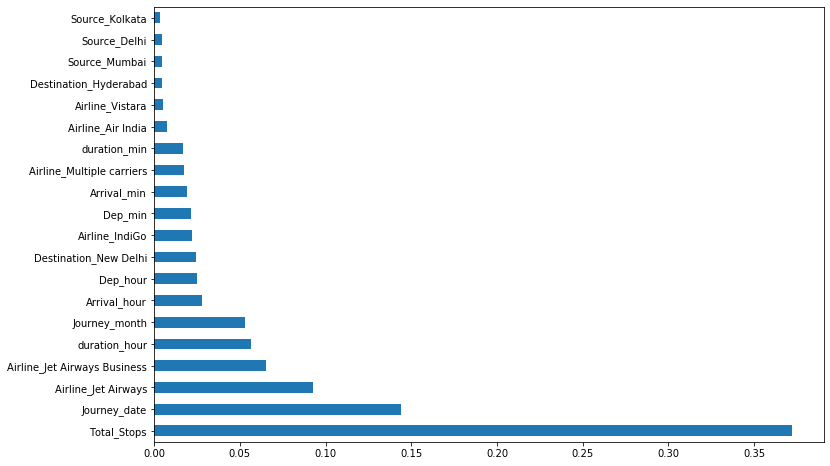

In [48]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [50]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
y_pred = reg_rf.predict(X_test)


In [52]:
reg_rf.score(X_train, y_train)


0.9545811032039453

In [53]:
reg_rf.score(X_test, y_test)


0.8119487708915205

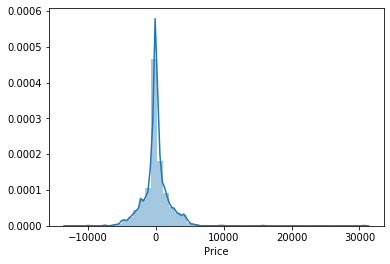

In [54]:
sns.distplot(y_test-y_pred)
plt.show()

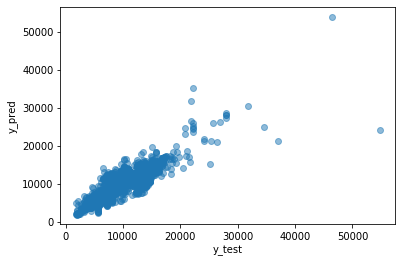

In [55]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1208.7906587559478
MSE: 3857060.541308956
RMSE: 1963.9400554265794


In [57]:
metrics.r2_score(y_test, y_pred)

0.8119487708915205

In [58]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [59]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [60]:
random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [61]:
random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  19.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  19.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  18.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  18.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  18.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  28.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  27.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [62]:
random.best_params_


{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [63]:
prediction = random.predict(X_test)


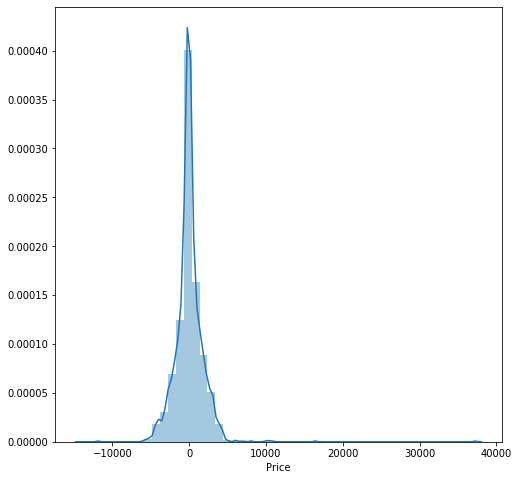

In [64]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

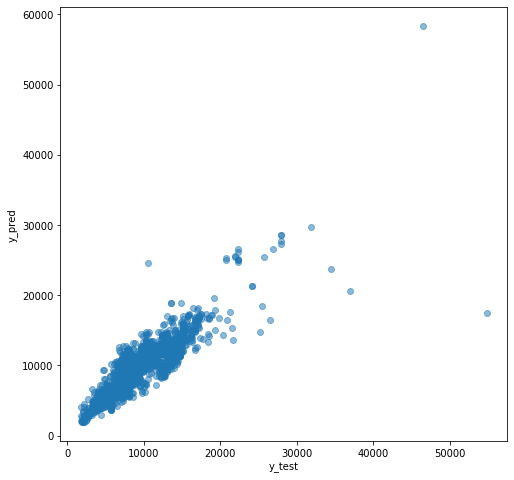

In [65]:

plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1175.7535778429542
MSE: 3644576.0996233206
RMSE: 1909.077290112509


# Save the model 


In [67]:
import pickle

In [71]:
#save the model and dumb the model
file=open('flight.pkl','wb')
pickle.dump(random,file)

In [74]:
model=open('flight.pkl','rb')
mp=pickle.load(model)#  load the model  file loaded  the memory

In [75]:
y_pred=mp.predict(X_test)

In [76]:
metrics.r2_score(y_test,y_pred)

0.8223084632005897